# Clean data and add features

The created dataset needs to be cleaned and additional features added.

Modules needed

In [160]:
import numpy as np
import pandas as pd

First let's read in all of the CSVs created:

In [161]:
#hdf5 metadata
hdf5_data= pd.read_csv('hdf5.csv', sep=',')
len(hdf5_data)

10000

In [162]:
#hdf5 metadata with genre
hdf5_w_genre=pd.read_csv('data_w_genre', sep=',')
len(hdf5_w_genre)

4011

In [163]:
#hdf5 with behavior
hdf5_w_behavior=pd.read_csv('data_w_behavior.csv', sep=',')
len(hdf5_w_behavior)

3675

In [164]:
#behavior with genre
behavior_w_genre=pd.read_csv('behavior_w_genre.csv',sep=',')
len(behavior_w_genre)

193840

In [281]:
#behavior
behavior=pd.read_csv('behavior.csv', sep=',')
len(behavior)

384546

In [269]:
#ultimate data set hdf5 + user behavior + genre
data=pd.read_csv('ultimate_mini.csv',sep=',')
len(data)

1760

# The mini ultimate data set

## clean data set

In [233]:
data.head()

,Unnamed: 0,song_id_x,play_count_sum,user_id_count,track_id,genre_id,artist_familiarty,artist_hotness,artist_id,artist_latitude,...,song_hotness,song_release_years,song_titles,song_bars,song_beats,song_keys,song_modes,song_tatum,song_tempo,song_time_signatures
0,0,SOAAEHR12A6D4FB060,957,554,TRAYPFH128E07937C3,Pop_Rock,0.806359,0.545789,AR5N8VN1187FB37A4E,47.60356,...,0.654068,1991,Slaves & Bulldozers,[ 0.85125 2.69826 4.53846 6.3912 ...,[ 3.88730000e-01 8.51250000e-01 1.3130100...,0,1,[ 1.56890000e-01 3.88730000e-01 6.2056000...,131.272,4
1,1,SOAAFUV12AB018831D,10,6,TRAMPCN12903CC4E5B,Reggae,0.623502,0.422380,AR5ZGC11187FB417A3,37.27188,...,NaN,0,Where Do The Children Play? (LP Version),[ 0.72088 2.49211 4.094 5.69368 ...,[ 0.24835 0.72088 1.19209 1.66199 ...,2,1,"[ 0.24835 0.48462 0.72088 ..., 213.08...",149.169,4
2,2,SOABLAF12AB018E1D9,1980,748,TRABUMO12903CBE25F,Pop_Rock,0.796337,0.582922,ARSW5F51187FB4CFC9,NaN,...,0.824433,2009,Lesson Learned,[ 0.92741 3.15716 5.38085 7.60259 ...,[ 0.3692 0.92741 1.48952 2.04734 ...,10,0,[ 8.94000000e-02 3.69200000e-01 6.4900000...,107.845,4
3,3,SOABVPU12AB018AA22,1,1,TRAYPXP12903CD8D45,Reggae,0.583443,0.385788,ARZZRK91187B9A5CA5,18.01571,...,0.299877,2009,Conquer Me,[ 1.08342 2.62899 4.18827 5.75054 ...,[ 0.28773 0.69392 1.08342 1.46969 ...,8,1,[ 8.56200000e-02 2.87730000e-01 4.9082000...,151.498,4
4,4,SOACEDS12A6701EAAA,230,80,TRASNOT128E0791785,Pop_Rock,0.712745,0.470700,ARP96FM1187B9AEA77,44.97903,...,0.612055,1998,Gone To The Movies,[ 0.67473 3.1441 5.58583 8.0254 ...,[ 0.67473 1.29676 1.91538 2.53247 ...,0,1,[ 0.36436 0.67473 0.98823 1.29676 ...,97.995,4


In [234]:
#delete Unnamed column which was created during merge
data=data.drop('Unnamed: 0',1)

In [235]:
#delete song_id_y column which was created during merge
data=data.drop('song_id_y',1)

In [236]:
#rename song_id column (got changed during merges)
data=data.rename(columns = {'song_id_x':'song_id'})

In [237]:
#substitute all NaN with 0
data = data.fillna(0)

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 0 to 1759
Data columns (total 23 columns):
song_id                 1760 non-null object
play_count_sum          1760 non-null int64
user_id_count           1760 non-null int64
track_id                1760 non-null object
genre_id                1760 non-null object
artist_familiarty       1760 non-null float64
artist_hotness          1760 non-null float64
artist_id               1760 non-null object
artist_latitude         1760 non-null float64
artist_location         1760 non-null object
artist_longitude        1760 non-null float64
artist_names            1760 non-null object
song_durations          1760 non-null float64
song_hotness            1760 non-null float64
song_release_years      1760 non-null int64
song_titles             1760 non-null object
song_bars               1760 non-null object
song_beats              1760 non-null object
song_keys               1760 non-null int64
song_modes              1760 non-nul

In [239]:
data.describe()

,play_count_sum,user_id_count,artist_familiarty,artist_hotness,artist_latitude,artist_longitude,song_durations,song_hotness,song_release_years,song_keys,song_modes,song_tempo,song_time_signatures
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,462.388068,182.150000,0.650936,0.453090,14.555694,-26.317367,241.905996,0.401018,1499.576705,5.376136,0.672159,125.041325,3.636932
std,1909.025630,724.219197,0.131488,0.117018,20.844045,45.906739,100.514858,0.262014,866.067613,3.576739,0.469560,35.464805,1.185232
min,1.000000,1.000000,0.000000,0.000000,-41.280540,-123.207900,7.130980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,6.000000,0.558481,0.374530,0.000000,-74.007120,187.388935,0.215080,1445.250000,2.000000,0.000000,98.524250,4.000000
50%,44.000000,18.000000,0.640635,0.435576,0.000000,0.000000,231.548930,0.463669,1998.000000,5.000000,1.000000,121.890000,4.000000
75%,209.250000,83.250000,0.747557,0.519965,35.222500,0.000000,280.090972,0.606810,2005.000000,9.000000,1.000000,146.237500,4.000000
max,40739.000000,14729.000000,1.000000,1.082503,69.651020,174.767140,1204.296690,0.984347,2010.000000,11.000000,1.000000,253.357000,7.000000


In [240]:
data.head()

,song_id,play_count_sum,user_id_count,track_id,genre_id,artist_familiarty,artist_hotness,artist_id,artist_latitude,artist_location,...,song_hotness,song_release_years,song_titles,song_bars,song_beats,song_keys,song_modes,song_tatum,song_tempo,song_time_signatures
0,SOAAEHR12A6D4FB060,957,554,TRAYPFH128E07937C3,Pop_Rock,0.806359,0.545789,AR5N8VN1187FB37A4E,47.60356,Seattle,...,0.654068,1991,Slaves & Bulldozers,[ 0.85125 2.69826 4.53846 6.3912 ...,[ 3.88730000e-01 8.51250000e-01 1.3130100...,0,1,[ 1.56890000e-01 3.88730000e-01 6.2056000...,131.272,4
1,SOAAFUV12AB018831D,10,6,TRAMPCN12903CC4E5B,Reggae,0.623502,0.422380,AR5ZGC11187FB417A3,37.27188,California,...,0.000000,0,Where Do The Children Play? (LP Version),[ 0.72088 2.49211 4.094 5.69368 ...,[ 0.24835 0.72088 1.19209 1.66199 ...,2,1,"[ 0.24835 0.48462 0.72088 ..., 213.08...",149.169,4
2,SOABLAF12AB018E1D9,1980,748,TRABUMO12903CBE25F,Pop_Rock,0.796337,0.582922,ARSW5F51187FB4CFC9,0.00000,"Seattle, WA",...,0.824433,2009,Lesson Learned,[ 0.92741 3.15716 5.38085 7.60259 ...,[ 0.3692 0.92741 1.48952 2.04734 ...,10,0,[ 8.94000000e-02 3.69200000e-01 6.4900000...,107.845,4
3,SOABVPU12AB018AA22,1,1,TRAYPXP12903CD8D45,Reggae,0.583443,0.385788,ARZZRK91187B9A5CA5,18.01571,"Kingston, Jamaica",...,0.299877,2009,Conquer Me,[ 1.08342 2.62899 4.18827 5.75054 ...,[ 0.28773 0.69392 1.08342 1.46969 ...,8,1,[ 8.56200000e-02 2.87730000e-01 4.9082000...,151.498,4
4,SOACEDS12A6701EAAA,230,80,TRASNOT128E0791785,Pop_Rock,0.712745,0.470700,ARP96FM1187B9AEA77,44.97903,"Minneapolis, MN",...,0.612055,1998,Gone To The Movies,[ 0.67473 3.1441 5.58583 8.0254 ...,[ 0.67473 1.29676 1.91538 2.53247 ...,0,1,[ 0.36436 0.67473 0.98823 1.29676 ...,97.995,4


In [274]:
#add a column with 1, so we can count songs
data['count'] = 1

Let's' missing song hotness replace with median
first we need to see how hotness is distributed, so we can decided between mean or median imputation

In [242]:
from matplotlib import pyplot as plt  
%matplotlib inline 
import seaborn as sb

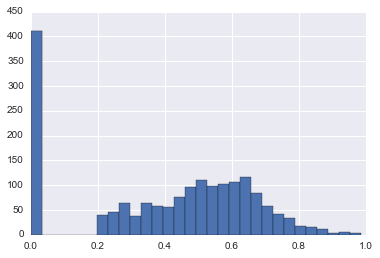

In [243]:
f = data.song_hotness.hist(bins=30)

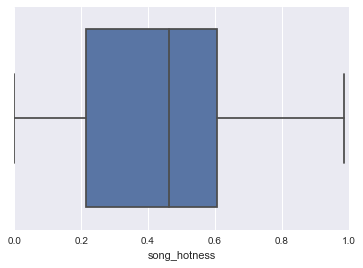

In [244]:
f = sb.boxplot(data.song_hotness)

In [245]:
median_song_hotness = data['song_hotness'].dropna().median()

In [246]:
data['song_hotness'] = data.song_hotness.mask(data.song_hotness == 0, median_song_hotness)

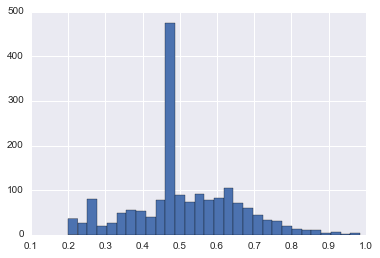

In [247]:
f = data.song_hotness.hist(bins=30)

We will do the same for artist hotness and artist familiarity, since they also have 0 values

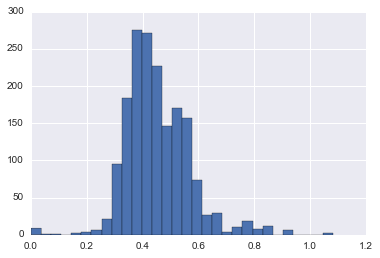

In [248]:
f = data.artist_hotness.hist(bins=30)

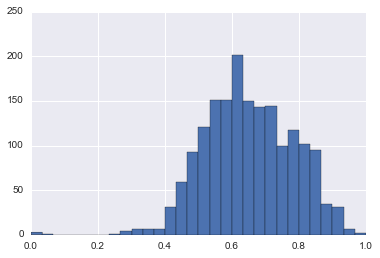

In [249]:
f = data.artist_familiarty.hist(bins=30)

In [250]:
mean_artist_hotness = data['artist_hotness'].dropna().mean()

In [251]:
data['artist_hotness'] = data.artist_hotness.mask(data.artist_hotness == 0, mean_artist_hotness)

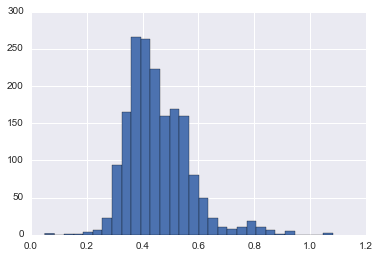

In [252]:
f = data.artist_hotness.hist(bins=30)

In [253]:
mean_artist_familiarty = data['artist_familiarty'].dropna().mean()

In [254]:
data['artist_familiarty'] = data.artist_familiarty.mask(data.artist_familiarty == 0, mean_artist_familiarty)

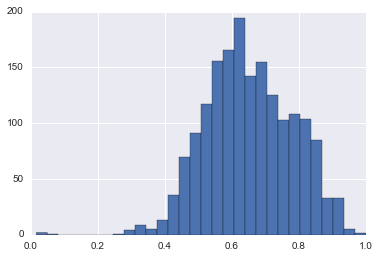

In [255]:
f = data.artist_familiarty.hist(bins=30)

Next, we will substitute missing years with the most common year

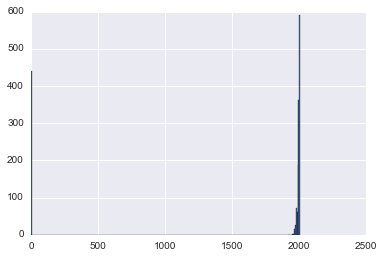

In [271]:
f = data.song_release_years.hist(bins=300)

In [272]:
from matplotlib import pyplot as plt  
%matplotlib inline 
import seaborn as sb
import vincent
reload(vincent)
vincent.initialize_notebook()

In [280]:
song_count = data['song_release_years'>0].groupby('song_release_years')[['count']].sum()
song_count.index = pd.to_datetime(song_count.index, format="%Y")
vincent.Line(song_count)

KeyError: True

In [257]:
median_song_release_years = data['song_release_years'].dropna().median()
data['song_release_years'] = data.song_release_years.mask(data.song_release_years == 0, median_song_release_years)

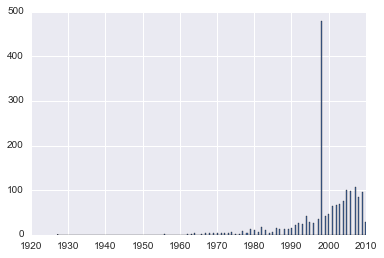

In [258]:
f = data.song_release_years.hist(bins=300)

## add features

In [259]:
#song bars actually consist of lists
data['song_bars'].head()

0    [   0.85125    2.69826    4.53846    6.3912   ...
1    [   0.72088    2.49211    4.094      5.69368  ...
2    [   0.92741    3.15716    5.38085    7.60259  ...
3    [   1.08342    2.62899    4.18827    5.75054  ...
4    [   0.67473    3.1441     5.58583    8.0254   ...
Name: song_bars, dtype: object

In [260]:
#number of beats
data['beats_number'] = [len(x) for x in data.song_beats]

In [261]:
#number of bars
data['bars_number'] = [len(x) for x in data.song_bars]

In [262]:
#number of bars
data['tatum_number'] = [len(x) for x in data.song_tatum]

The distribution of play_count_sum and user_id_count is very wide, therefore we will add a log column for each 

In [263]:
data['log_play_count_sum'] = np.log(data[['play_count_sum']])

In [264]:
data['log_user_id_count'] = np.log(data[['user_id_count']])

In [265]:
data.head()

,song_id,play_count_sum,user_id_count,track_id,genre_id,artist_familiarty,artist_hotness,artist_id,artist_latitude,artist_location,...,song_modes,song_tatum,song_tempo,song_time_signatures,count,beats_number,bars_number,tatum_number,log_play_count_sum,log_user_id_count
0,SOAAEHR12A6D4FB060,957,554,TRAYPFH128E07937C3,Pop_Rock,0.806359,0.545789,AR5N8VN1187FB37A4E,47.60356,Seattle,...,1,[ 1.56890000e-01 3.88730000e-01 6.2056000...,131.272,4,1,15715,2532,109,6.863803,6.317165
1,SOAAFUV12AB018831D,10,6,TRAMPCN12903CC4E5B,Reggae,0.623502,0.422380,AR5ZGC11187FB417A3,37.27188,California,...,1,"[ 0.24835 0.48462 0.72088 ..., 213.08...",149.169,4,1,5912,1474,72,2.302585,1.791759
2,SOABLAF12AB018E1D9,1980,748,TRABUMO12903CBE25F,Pop_Rock,0.796337,0.582922,ARSW5F51187FB4CFC9,0.00000,"Seattle, WA",...,0,[ 8.94000000e-02 3.69200000e-01 6.4900000...,107.845,4,1,5036,1250,15612,7.590852,6.617403
3,SOABVPU12AB018AA22,1,1,TRAYPXP12903CD8D45,Reggae,0.583443,0.385788,ARZZRK91187B9A5CA5,18.01571,"Kingston, Jamaica",...,1,[ 8.56200000e-02 2.87730000e-01 4.9082000...,151.498,4,1,5005,1240,15508,0.000000,0.000000
4,SOACEDS12A6701EAAA,230,80,TRASNOT128E0791785,Pop_Rock,0.712745,0.470700,ARP96FM1187B9AEA77,44.97903,"Minneapolis, MN",...,1,[ 0.36436 0.67473 0.98823 1.29676 ...,97.995,4,1,4092,1014,8191,5.438079,4.382027


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 0 to 1759
Data columns (total 29 columns):
song_id                 1760 non-null object
play_count_sum          1760 non-null int64
user_id_count           1760 non-null int64
track_id                1760 non-null object
genre_id                1760 non-null object
artist_familiarty       1760 non-null float64
artist_hotness          1760 non-null float64
artist_id               1760 non-null object
artist_latitude         1760 non-null float64
artist_location         1760 non-null object
artist_longitude        1760 non-null float64
artist_names            1760 non-null object
song_durations          1760 non-null float64
song_hotness            1760 non-null float64
song_release_years      1760 non-null float64
song_titles             1760 non-null object
song_bars               1760 non-null object
song_beats              1760 non-null object
song_keys               1760 non-null int64
song_modes              1760 non-n

In [267]:
data.describe()

,play_count_sum,user_id_count,artist_familiarty,artist_hotness,artist_latitude,artist_longitude,song_durations,song_hotness,song_release_years,song_keys,song_modes,song_tempo,song_time_signatures,count,beats_number,bars_number,tatum_number,log_play_count_sum,log_user_id_count
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,462.388068,182.150000,0.651306,0.455407,14.555694,-26.317367,241.905996,0.509295,1999.076705,5.376136,0.672159,125.041325,3.636932,1,6055.241477,1940.652273,4833.406818,3.877748,3.134512
std,1909.025630,724.219197,0.130568,0.112417,20.844045,45.906739,100.514858,0.142346,8.402017,3.576739,0.469560,35.464805,1.185232,0,3378.891528,1788.931690,5690.317673,2.111355,1.933786
min,1.000000,1.000000,0.015558,0.049034,-41.280540,-123.207900,7.130980,0.199238,1927.000000,0.000000,0.000000,0.000000,0.000000,1,2.000000,2.000000,2.000000,0.000000,0.000000
25%,10.000000,6.000000,0.558481,0.375427,0.000000,-74.007120,187.388935,0.457420,1998.000000,2.000000,0.000000,98.524250,4.000000,1,3759.750000,1014.000000,109.000000,2.302585,1.791759
50%,44.000000,18.000000,0.640708,0.438078,0.000000,0.000000,231.548930,0.463759,1998.000000,5.000000,1.000000,121.890000,4.000000,1,5555.500000,1448.000000,109.000000,3.784190,2.890372
75%,209.250000,83.250000,0.747557,0.519965,35.222500,0.000000,280.090972,0.606810,2005.000000,9.000000,1.000000,146.237500,4.000000,1,7895.000000,2065.250000,9536.250000,5.343528,4.421835
max,40739.000000,14729.000000,1.000000,1.082503,69.651020,174.767140,1204.296690,0.984347,2010.000000,11.000000,1.000000,253.357000,7.000000,1,17181.000000,16284.000000,17233.000000,10.614941,9.597574


In [283]:
data.head()

,Unnamed: 0,song_id_x,play_count_sum,user_id_count,track_id,genre_id,artist_familiarty,artist_hotness,artist_id,artist_latitude,...,song_release_years,song_titles,song_bars,song_beats,song_keys,song_modes,song_tatum,song_tempo,song_time_signatures,count
0,0,SOAAEHR12A6D4FB060,957,554,TRAYPFH128E07937C3,Pop_Rock,0.806359,0.545789,AR5N8VN1187FB37A4E,47.60356,...,1991,Slaves & Bulldozers,[ 0.85125 2.69826 4.53846 6.3912 ...,[ 3.88730000e-01 8.51250000e-01 1.3130100...,0,1,[ 1.56890000e-01 3.88730000e-01 6.2056000...,131.272,4,1
1,1,SOAAFUV12AB018831D,10,6,TRAMPCN12903CC4E5B,Reggae,0.623502,0.422380,AR5ZGC11187FB417A3,37.27188,...,0,Where Do The Children Play? (LP Version),[ 0.72088 2.49211 4.094 5.69368 ...,[ 0.24835 0.72088 1.19209 1.66199 ...,2,1,"[ 0.24835 0.48462 0.72088 ..., 213.08...",149.169,4,1
2,2,SOABLAF12AB018E1D9,1980,748,TRABUMO12903CBE25F,Pop_Rock,0.796337,0.582922,ARSW5F51187FB4CFC9,NaN,...,2009,Lesson Learned,[ 0.92741 3.15716 5.38085 7.60259 ...,[ 0.3692 0.92741 1.48952 2.04734 ...,10,0,[ 8.94000000e-02 3.69200000e-01 6.4900000...,107.845,4,1
3,3,SOABVPU12AB018AA22,1,1,TRAYPXP12903CD8D45,Reggae,0.583443,0.385788,ARZZRK91187B9A5CA5,18.01571,...,2009,Conquer Me,[ 1.08342 2.62899 4.18827 5.75054 ...,[ 0.28773 0.69392 1.08342 1.46969 ...,8,1,[ 8.56200000e-02 2.87730000e-01 4.9082000...,151.498,4,1
4,4,SOACEDS12A6701EAAA,230,80,TRASNOT128E0791785,Pop_Rock,0.712745,0.470700,ARP96FM1187B9AEA77,44.97903,...,1998,Gone To The Movies,[ 0.67473 3.1441 5.58583 8.0254 ...,[ 0.67473 1.29676 1.91538 2.53247 ...,0,1,[ 0.36436 0.67473 0.98823 1.29676 ...,97.995,4,1


In [268]:
data.to_csv('clean_data.csv',sep=',')